In [1]:
# Dependencies And Setup
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

# File Path To Target CSV File
diabetes_data_to_load = Path("Resources/diabetes_prediction_dataset.csv")

# Reading Of Diabetes CSV Data File, Storage In Pandas DataFrame
diabetes_data = pd.read_csv(diabetes_data_to_load)

# Display DataFrame
diabetes_data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [2]:
# Renaming Columns
diabetes_data.rename(columns={"gender": "Gender", "age": "Age", "hypertension": "Hypertension Status", "heart_disease": "Heart Disease Status", "smoking_history": "Smoking History", "bmi": "Body Mass Index", "HbA1c_level": "HbA1c Level", "blood_glucose_level": "Blood Glucose Level", "diabetes": "Diabetes Status"}, inplace=True)

diabetes_data.head(10)

,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c Level,Blood Glucose Level,Diabetes Status
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
# Data Types For Columns
diabetes_data.dtypes

Gender                   object
Age                     float64
Hypertension Status       int64
Heart Disease Status      int64
Smoking History          object
Body Mass Index         float64
HbA1c Level             float64
Blood Glucose Level       int64
Diabetes Status           int64
dtype: object

In [4]:
# Counts For Each Column
diabetes_data.count()

Gender                  100000
Age                     100000
Hypertension Status     100000
Heart Disease Status    100000
Smoking History         100000
Body Mass Index         100000
HbA1c Level             100000
Blood Glucose Level     100000
Diabetes Status         100000
dtype: int64

In [5]:
# Clean Smoking Column For Repeats
diabetes_data["Smoking History"] = diabetes_data["Smoking History"].replace({"No Info": "N/A", "never": "Never", "former": "Former", "current": "Current", "not current": "Former", "ever": "Never"})
diabetes_data.head(10)

,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c Level,Blood Glucose Level,Diabetes Status
0,Female,80.0,0,1,Never,25.19,6.6,140,0
1,Female,54.0,0,0,N/A,27.32,6.6,80,0
2,Male,28.0,0,0,Never,27.32,5.7,158,0
3,Female,36.0,0,0,Current,23.45,5.0,155,0
4,Male,76.0,1,1,Current,20.14,4.8,155,0
5,Female,20.0,0,0,Never,27.32,6.6,85,0
6,Female,44.0,0,0,Never,19.31,6.5,200,1
7,Female,79.0,0,0,N/A,23.86,5.7,85,0
8,Male,42.0,0,0,Never,33.64,4.8,145,0
9,Female,32.0,0,0,Never,27.32,5.0,100,0


In [6]:
# for hba1c
# assign bins
# name groups

bins = [0,5.6,6.4,10]
group_names = ["Normal","Pre-Diabetic","Diabetic"]

diabetes_data["HbA1c Classification"] = pd.cut(diabetes_data["HbA1c Level"], bins, labels=group_names, include_lowest=True)
diabetes_data.head(10)

,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c Level,Blood Glucose Level,Diabetes Status,HbA1c Classification
0,Female,80.0,0,1,Never,25.19,6.6,140,0,Diabetic
1,Female,54.0,0,0,N/A,27.32,6.6,80,0,Diabetic
2,Male,28.0,0,0,Never,27.32,5.7,158,0,Pre-Diabetic
3,Female,36.0,0,0,Current,23.45,5.0,155,0,Normal
4,Male,76.0,1,1,Current,20.14,4.8,155,0,Normal
5,Female,20.0,0,0,Never,27.32,6.6,85,0,Diabetic
6,Female,44.0,0,0,Never,19.31,6.5,200,1,Diabetic
7,Female,79.0,0,0,N/A,23.86,5.7,85,0,Pre-Diabetic
8,Male,42.0,0,0,Never,33.64,4.8,145,0,Normal
9,Female,32.0,0,0,Never,27.32,5.0,100,0,Normal


In [7]:
# for blood glucose
# assign bins
# name groups

bins = [0,139,199,300]
glucose_group_names = ["Normal","Pre-Diabetic","Diabetic"]

diabetes_data["Blood Glucose Level Classification"] = pd.cut(diabetes_data["Blood Glucose Level"],bins,labels=glucose_group_names,include_lowest=True)
diabetes_data.head(50)

,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c Level,Blood Glucose Level,Diabetes Status,HbA1c Classification,Blood Glucose Level Classification
0,Female,80.0,0,1,Never,25.19,6.6,140,0,Diabetic,Pre-Diabetic
1,Female,54.0,0,0,N/A,27.32,6.6,80,0,Diabetic,Normal
2,Male,28.0,0,0,Never,27.32,5.7,158,0,Pre-Diabetic,Pre-Diabetic
3,Female,36.0,0,0,Current,23.45,5.0,155,0,Normal,Pre-Diabetic
4,Male,76.0,1,1,Current,20.14,4.8,155,0,Normal,Pre-Diabetic
5,Female,20.0,0,0,Never,27.32,6.6,85,0,Diabetic,Normal
6,Female,44.0,0,0,Never,19.31,6.5,200,1,Diabetic,Diabetic
7,Female,79.0,0,0,N/A,23.86,5.7,85,0,Pre-Diabetic,Normal
8,Male,42.0,0,0,Never,33.64,4.8,145,0,Normal,Pre-Diabetic
9,Female,32.0,0,0,Never,27.32,5.0,100,0,Normal,Normal


In [31]:
bins = [0.00, 18.40, 24.90, 29.90, 96.00]
bmi_intervals = ["Underweight", "Healthy Weight", "Overweight", "Obese"]
diabetes_data["BMI Classification"] = pd.cut(diabetes_data["Body Mass Index"], bins, labels=bmi_intervals, include_lowest=True)
diabetes_data

,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c Level,Blood Glucose Level,Diabetes Status,HbA1c Classification,Blood Glucose Level Classification,Age Quartiles,BMI Classification
0,Female,80.0,0,1,Never,25.19,6.6,140,0,Diabetic,Pre-Diabetic,A4,Overweight
1,Female,54.0,0,0,N/A,27.32,6.6,80,0,Diabetic,Normal,A3,Overweight
2,Male,28.0,0,0,Never,27.32,5.7,158,0,Pre-Diabetic,Pre-Diabetic,A2,Overweight
3,Female,36.0,0,0,Current,23.45,5.0,155,0,Normal,Pre-Diabetic,A2,Healthy Weight
4,Male,76.0,1,1,Current,20.14,4.8,155,0,Normal,Pre-Diabetic,A4,Healthy Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,N/A,27.32,6.2,90,0,Pre-Diabetic,Normal,A4,Overweight
99996,Female,2.0,0,0,N/A,17.37,6.5,100,0,Diabetic,Normal,A1,Underweight
99997,Male,66.0,0,0,Former,27.83,5.7,155,0,Pre-Diabetic,Pre-Diabetic,A4,Overweight
99998,Female,24.0,0,0,Never,35.42,4.0,100,0,Normal,Normal,A1,Obese


In [47]:
# summary statistics based on diabetes by blood glucose
mean_glucose = diabetes_data.groupby("Diabetes Status")["Blood Glucose Level"].mean()
median_glucose = diabetes_data.groupby("Diabetes Status")["Blood Glucose Level"].median()
var_glucose = diabetes_data.groupby("Diabetes Status")["Blood Glucose Level"].var()
stdev_glucose = diabetes_data.groupby("Diabetes Status")["Blood Glucose Level"].std()
sem_glucose = diabetes_data.groupby("Diabetes Status")["Blood Glucose Level"].sem()

sum_statistics_glucose = pd.DataFrame({
    "Mean Glucose Blood Level": mean_glucose,
    "Median Glucose Blood Level": median_glucose,
    "Blood Glucose Variance": var_glucose,
    "Blood Glucose St Dev": stdev_glucose,
    "Blood Glucose St Err": sem_glucose
})
sum_statistics_glucose

,Mean Glucose Blood Level,Median Glucose Blood Level,Blood Glucose Variance,Blood Glucose St Dev,Blood Glucose St Err
Diabetes Status,,,,,
0,132.852470,140.0,1172.876266,34.247281,0.113218
1,194.094706,160.0,3438.779946,58.641111,0.636052


In [49]:
# summary statistics based on diabetes by hba1c level
mean_hba1c = diabetes_data.groupby("Diabetes Status")["HbA1c Level"].mean()
median_hba1c = diabetes_data.groupby("Diabetes Status")["HbA1c Level"].median()
var_hba1c = diabetes_data.groupby("Diabetes Status")["HbA1c Level"].var()
stdev_hba1c = diabetes_data.groupby("Diabetes Status")["HbA1c Level"].std()
sem_hba1c = diabetes_data.groupby("Diabetes Status")["HbA1c Level"].sem()

sum_statistics_hba1c = pd.DataFrame({
    "Mean HbA1c Level": mean_hba1c,
    "Median HbA1c Level": median_hba1c,
    "HbA1c Variance": var_hba1c,
    "hBA1c St Dev": stdev_hba1c,
    "hBa1c St Err": sem_hba1c
})
sum_statistics_hba1c

,Mean HbA1c Level,Median HbA1c Level,HbA1c Variance,hBA1c St Dev,hBa1c St Err
Diabetes Status,,,,,
0,5.396761,5.8,0.944061,0.971628,0.003212
1,6.934953,6.6,1.158986,1.076562,0.011677


In [30]:
gender_groupby = diabetes_data.groupby(["Gender", "Diabetes Status", "Blood Glucose Level Classification"])["Blood Glucose Level"].mean()
gender_groupby

Gender  Diabetes Status  Blood Glucose Level Classification
Female  0                Normal                                101.931771
                         Pre-Diabetic                          152.818586
                         Diabetic                              200.000000
        1                Normal                                128.018996
                         Pre-Diabetic                          151.986236
                         Diabetic                              251.758402
Male    0                Normal                                101.833179
                         Pre-Diabetic                          152.810186
                         Diabetic                              200.000000
        1                Normal                                128.165821
                         Pre-Diabetic                          151.946734
                         Diabetic                              250.807055
Other   0                Normal                     

In [38]:
bmi_glucose = diabetes_data.groupby(["Gender","BMI Classification", "Diabetes Status"])["Blood Glucose Level"].mean()
print(bmi_glucose)

Gender  BMI Classification  Diabetes Status
Female  Underweight         0                  133.188355
                            1                  198.125000
        Healthy Weight      0                  132.255246
                            1                  189.671082
        Overweight          0                  133.015648
                            1                  192.536449
        Obese               0                  132.934011
                            1                  195.637792
Male    Underweight         0                  132.883826
                            1                  214.000000
        Healthy Weight      0                  132.778476
                            1                  193.397933
        Overweight          0                  133.117897
                            1                  193.202450
        Obese               0                  132.524029
                            1                  195.227249
Other   Underweight         

In [39]:
bmi_hba1c = diabetes_data.groupby(["Gender","BMI Classification", "Diabetes Status"])["HbA1c Level"].mean()
print(bmi_hba1c)

Gender  BMI Classification  Diabetes Status
Female  Underweight         0                  5.402617
                            1                  7.089583
        Healthy Weight      0                  5.391304
                            1                  7.049007
        Overweight          0                  5.390806
                            1                  6.943676
        Obese               0                  5.389210
                            1                  6.913248
Male    Underweight         0                  5.400275
                            1                  7.093333
        Healthy Weight      0                  5.399772
                            1                  6.906977
        Overweight          0                  5.401969
                            1                  6.961785
        Obese               0                  5.416629
                            1                  6.904004
Other   Underweight         0                  5.550000
    

In [8]:
# break down by diabetes and hba1c level counts
diabetic_hba1c = diabetes_data.groupby(["Diabetes Status"])["HbA1c Classification"].value_counts()
diabetic_hba1c

Diabetes Status  HbA1c Classification
0                Pre-Diabetic            38037
                 Normal                  37857
                 Diabetic                15606
1                Diabetic                 5191
                 Pre-Diabetic             3309
                 Normal                      0
Name: count, dtype: int64

In [9]:
# hba1c classifications by diabetic population
alt_diabetic = diabetes_data.loc[diabetes_data["Diabetes Status"]==1]
diabetes_by_status_hba1c = alt_diabetic["HbA1c Classification"].value_counts()
diabetes_by_status_hba1c

HbA1c Classification
Diabetic        5191
Pre-Diabetic    3309
Normal             0
Name: count, dtype: int64

In [10]:
# blood glucose classification by diabetic population
diabetes_by_status_glucose = alt_diabetic["Blood Glucose Level Classification"].value_counts()
diabetes_by_status_glucose

Blood Glucose Level Classification
Diabetic        3924
Pre-Diabetic    3248
Normal          1328
Name: count, dtype: int64

In [11]:
# break down by diabetes and blood glucose level counts
diabetic_glucose = diabetes_data.groupby(["Diabetes Status"])["Blood Glucose Level Classification"].value_counts()
diabetic_glucose

Diabetes Status  Blood Glucose Level Classification
0                Normal                                42312
                 Pre-Diabetic                          42235
                 Diabetic                               6953
1                Diabetic                               3924
                 Pre-Diabetic                           3248
                 Normal                                 1328
Name: count, dtype: int64

In [12]:
# Breaking Down Main Data Set By Age Quartiles
diabetes_data["Age Quartiles"], cutoffs = pd.qcut(diabetes_data["Age"], q=4, labels=["A1", "A2", "A3", "A4"], retbins=True)
print(diabetes_data.head())

#Gives The Cutoffs For Each Age Quartile
print("\nQuartile Cutoffs: ", cutoffs)
print("A1: 0.08-24\n"
      "A2: 24-43\n"
      "A3: 43-60\n"
      "A4: 60-80")

   Gender   Age  Hypertension Status  Heart Disease Status Smoking History  \
0  Female  80.0                    0                     1           Never   
1  Female  54.0                    0                     0             N/A   
2    Male  28.0                    0                     0           Never   
3  Female  36.0                    0                     0         Current   
4    Male  76.0                    1                     1         Current   

   Body Mass Index  HbA1c Level  Blood Glucose Level  Diabetes Status  \
0            25.19          6.6                  140                0   
1            27.32          6.6                   80                0   
2            27.32          5.7                  158                0   
3            23.45          5.0                  155                0   
4            20.14          4.8                  155                0   

  HbA1c Classification Blood Glucose Level Classification Age Quartiles  
0             Diab

In [13]:
# standard deviation and variance for age quartiles A1
a1_d_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A1") & (diabetes_data["Diabetes Status"] == 1)]
a1_d_total_sd = a1_d_total["Age"].std()
a1_d_total_v = a1_d_total["Age"].var()
print(a1_d_total_sd)
print(a1_d_total_v)

a1_nd_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A1") & (diabetes_data["Diabetes Status"] == 0)]
a1_nd_total_sd = a1_nd_total["Age"].std()
a1_nd_total_v = a1_nd_total["Age"].var()
print(a1_nd_total_sd)
print(a1_nd_total_v)

5.656839437852101
31.99983242563888
7.438175762611023
55.326458675494074


In [14]:
# standard deviation and variance for age quartiles A2
a2_d_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A2") & (diabetes_data["Diabetes Status"] == 1)]
a2_d_total_sd = a2_d_total["Age"].std()
a2_d_total_v = a2_d_total["Age"].var()
print(a2_d_total_sd)
print(a2_d_total_v)

a2_nd_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A2") & (diabetes_data["Diabetes Status"] == 0)]
a2_nd_total_sd = a2_nd_total["Age"].std()
a2_nd_total_v = a2_nd_total["Age"].var()
print(a2_nd_total_sd)
print(a2_nd_total_v)

5.14996993642171
26.522190346047434
5.5104118796755115
30.364639083669


In [15]:
# stardard deviation and variance for age quartiles A3
a3_d_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A3") & (diabetes_data["Diabetes Status"] == 1)]
a3_d_total_sd = a3_d_total["Age"].std()
a3_d_total_v = a3_d_total["Age"].var()
print(a3_d_total_sd)
print(a3_d_total_v)

a3_nd_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A3") & (diabetes_data["Diabetes Status"] == 0)]
a3_nd_total_sd = a3_nd_total["Age"].std()
a3_nd_total_v = a3_nd_total["Age"].var()
print(a3_nd_total_sd)
print(a3_nd_total_v)

4.700477931163414
22.094492781354287
4.82387658481317
23.269785305508766


In [16]:
#standard deviation and variance for age quartiles A4
a4_d_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A4") & (diabetes_data["Diabetes Status"] == 1)]
a4_d_total_sd = a4_d_total["Age"].std()
a4_d_total_v = a4_d_total["Age"].var()
print(a4_d_total_sd)
print(a4_d_total_v)

a4_nd_total = diabetes_data[(diabetes_data["Age Quartiles"] == "A4") & (diabetes_data["Diabetes Status"] == 0)]
a4_nd_total_sd = a4_nd_total["Age"].std()
a4_nd_total_v = a4_nd_total["Age"].var()
print(a4_nd_total_sd)
print(a4_nd_total_v)

6.543749576886504
42.8206585250023
6.795021306915439
46.1723145614348


In [17]:
# average blood glucose by diabetes and age
# Average blood glucose For Each Age Quartile WITHOUT Diabetes
without_diabetes = diabetes_data[(diabetes_data["Diabetes Status"] == 0)]
age_groups_bglucose_ndiabetes_grouping = without_diabetes.groupby(["Age Quartiles"])["Blood Glucose Level"].mean()
age_groups_bglucose_ndiabetes = age_groups_bglucose_ndiabetes_grouping.tolist()
age_groups_bglucose_ndiabetes

[132.68569762922658, 132.7152222313845, 133.07671548024598, 132.98736318934067]

In [40]:
# count the number of people without diabetes per blood glucose level in each age bracket
count_age_groups_bglucose_ndiabetes = without_diabetes.groupby(["Age Quartiles"])["Blood Glucose Level"].count()
count_age_groups_bglucose_ndiabetes

Age Quartiles
A1    25730
A2    24254
A3    22603
A4    18913
Name: Blood Glucose Level, dtype: int64

In [18]:
# Average blood glucose For Each Age Quartile WITH Diabetes
with_diabetes = diabetes_data[(diabetes_data["Diabetes Status"] == 1)]
age_groups_bglucose_diabetes_grouping = with_diabetes.groupby(["Age Quartiles"])["Blood Glucose Level"].mean()
age_groups_bglucose_diabetes = age_groups_bglucose_diabetes_grouping.tolist()
age_groups_bglucose_diabetes

[195.4516129032258, 192.30911188004615, 193.1257702065966, 194.9446916719644]

In [41]:
# count the number of people with diabetes per blood glucose level in each age bracket
count_age_groups_bglucose_diabetes = with_diabetes.groupby(["Age Quartiles"])["Blood Glucose Level"].count()
count_age_groups_bglucose_diabetes

Age Quartiles
A1     155
A2     867
A3    2759
A4    4719
Name: Blood Glucose Level, dtype: int64

In [19]:
# average hba1c by diabetes and age
# Average HbA1c For Each Age Quartile WITHOUT Diabetes
without_diabetes = diabetes_data[(diabetes_data["Diabetes Status"] == 0)]
age_groups_hba1c_ndiabetes_grouping = without_diabetes.groupby(["Age Quartiles"])["HbA1c Level"].mean()
age_groups_hba1c_ndiabetes = age_groups_hba1c_ndiabetes_grouping.tolist()
age_groups_hba1c_ndiabetes

[5.397298872910999, 5.395831615403645, 5.40075653674291, 5.392444350446783]

In [43]:
# count the number of people without diabetes per hba1c level in each age bracket
count_age_groups_hba1c_ndiabetes = without_diabetes.groupby(["Age Quartiles"])["HbA1c Level"].count()
count_age_groups_hba1c_ndiabetes

Age Quartiles
A1    25730
A2    24254
A3    22603
A4    18913
Name: HbA1c Level, dtype: int64

In [20]:
# Average HbA1c For Each Age Quartile WITH Diabetes
with_diabetes = diabetes_data[(diabetes_data["Diabetes Status"] == 1)]
age_groups_hba1c_diabetes_grouping = with_diabetes.groupby(["Age Quartiles"])["HbA1c Level"].mean()
age_groups_hba1c_diabetes = age_groups_hba1c_diabetes_grouping.tolist()
age_groups_hba1c_diabetes

[6.969677419354839, 6.914302191464821, 6.946212395795578, 6.931023521932613]

In [44]:
# count the number of people with diabetes per hba1c level in each age bracket
count_age_groups_hba1c_diabetes = with_diabetes.groupby(["Age Quartiles"])["HbA1c Level"].count()
count_age_groups_hba1c_diabetes

Age Quartiles
A1     155
A2     867
A3    2759
A4    4719
Name: HbA1c Level, dtype: int64

In [21]:
glucose_hba1c_df = pd.DataFrame({
    "Blood Glucose Avg without Diabetes": age_groups_bglucose_ndiabetes,
    "Blood Glucose Avg with Diabetes": age_groups_bglucose_diabetes,
    "HbA1c Avg without Diabetes": age_groups_hba1c_ndiabetes,
    "HbA1c Avg with Diabetes": age_groups_hba1c_diabetes})
glucose_hba1c_df

,Blood Glucose Avg without Diabetes,Blood Glucose Avg with Diabetes,HbA1c Avg without Diabetes,HbA1c Avg with Diabetes
0,132.685698,195.451613,5.397299,6.969677
1,132.715222,192.309112,5.395832,6.914302
2,133.076715,193.125770,5.400757,6.946212
3,132.987363,194.944692,5.392444,6.931024


In [ ]:
count_glucose_hba1c_df = pd.DataFrame({
    
})

In [27]:
diabetes_bglucose_grouping = diabetes_data.groupby(["Diabetes Status","Blood Glucose Level Classification"])["Blood Glucose Level"].mean()
diabetes_bglucose_grouping

Diabetes Status  Blood Glucose Level Classification
0                Normal                                101.891213
                 Pre-Diabetic                          152.815911
                 Diabetic                              200.000000
1                Normal                                128.084337
                 Pre-Diabetic                          151.967057
                 Diabetic                              251.304791
Name: Blood Glucose Level, dtype: float64

In [28]:
diabetes_hba1c_grouping = diabetes_data.groupby(["Diabetes Status","HbA1c Classification"])["HbA1c Level"].mean()
diabetes_hba1c_grouping

Diabetes Status  HbA1c Classification
0                Normal                  4.356872
                 Pre-Diabetic            5.958430
                 Diabetic                6.550346
1                Normal                       NaN
                 Pre-Diabetic            5.955183
                 Diabetic                7.559507
Name: HbA1c Level, dtype: float64

In [22]:
glucose_groups = diabetes_data.groupby(["Blood Glucose Level Classification"])["Blood Glucose Level"]].mean()
glucose_groups

Blood Glucose Level Classification
Normal          102.688291
Pre-Diabetic    152.755293
Diabetic        218.508780
Name: Blood Glucose Level, dtype: float64

In [23]:
hba1c_groups = diabetes_data.groupby(["HbA1c Classification"])["HbA1c Level"].mean()
hba1c_groups

HbA1c Classification
Normal          4.356872
Pre-Diabetic    5.958170
Diabetic        6.802236
Name: HbA1c Level, dtype: float64

In [24]:
hba1c_blood_glucose_averages = pd.DataFrame({
    "Blood Glucose Classification Avg": glucose_groups,
    "HbA1c Classification Avg": hba1c_groups
})
hba1c_blood_glucose_averages

,Blood Glucose Classification Avg,HbA1c Classification Avg
Normal,102.688291,4.356872
Pre-Diabetic,152.755293,5.958170
Diabetic,218.508780,6.802236


The correlation between HbA1C and Blood Glucose levels is 0.17


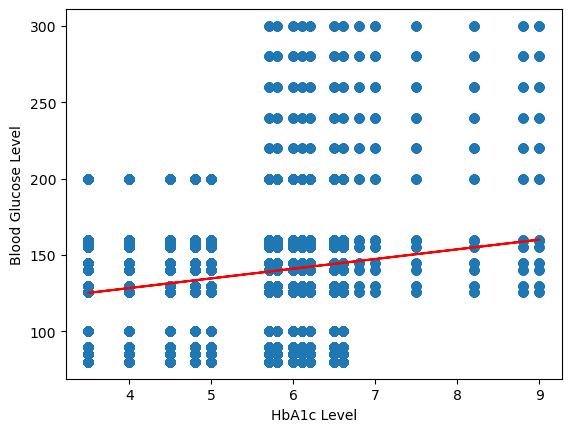

In [25]:
# create scatter plot for HbA1c and Blood Glucose
x_values = diabetes_data["HbA1c Level"]
y_values = diabetes_data["Blood Glucose Level"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel("HbA1c Level")
plt.ylabel("Blood Glucose Level")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between HbA1C and Blood Glucose levels is {round(correlation[0],2)}")
